In [1]:
import pandas as pd

dat_df = pd.read_csv('energydata.csv', sep = ',')[['date', 'Appliances']]
dat_df['date'] = pd.to_datetime(dat_df['date'], format = '%Y-%m-%d %H:%M:%S')

dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


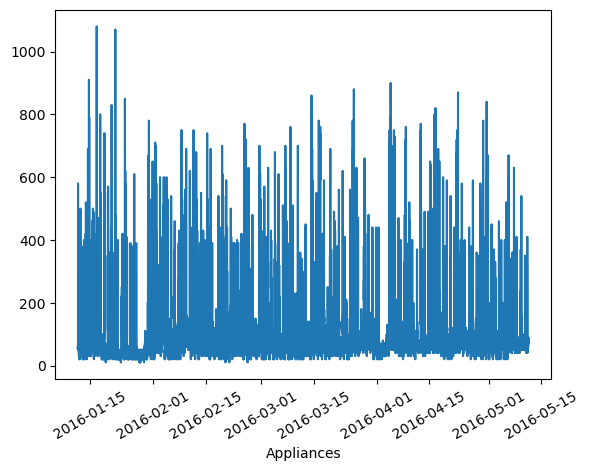

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation = 30)
plt.xlabel('Appliances')
plt.show()

In [3]:
train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [4]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()

train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']])

In [5]:
width = 144
train = train.flatten()
train_vec = []

for i in range(len(train) - width):
    train_vec.append(train[i:i+width])
    
print(pd.DataFrame(train_vec).shape)
pd.DataFrame(train_vec)

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,0.046729,0.037383,0.056075,0.046729,0.037383,0.056075,0.046729,0.074766,0.074766,0.093458,...,0.074766,0.074766,0.065421,0.065421,0.074766,0.074766,0.074766,0.065421,0.074766,0.065421
12956,0.037383,0.056075,0.046729,0.037383,0.056075,0.046729,0.074766,0.074766,0.093458,0.084112,...,0.074766,0.065421,0.065421,0.074766,0.074766,0.074766,0.065421,0.074766,0.065421,0.074766
12957,0.056075,0.046729,0.037383,0.056075,0.046729,0.074766,0.074766,0.093458,0.084112,0.093458,...,0.065421,0.065421,0.074766,0.074766,0.074766,0.065421,0.074766,0.065421,0.074766,0.074766
12958,0.046729,0.037383,0.056075,0.046729,0.074766,0.074766,0.093458,0.084112,0.093458,0.102804,...,0.065421,0.074766,0.074766,0.074766,0.065421,0.074766,0.065421,0.074766,0.074766,0.074766


In [6]:
test = test.flatten()
test_vec = []

for i in range(len(test) - width):
    test_vec.append(test[i:i+width])
    
print(pd.DataFrame(test_vec).shape)
pd.DataFrame(test_vec)

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,0.035294,0.047059,0.058824,0.058824,0.058824,0.070588,0.058824,0.070588,0.070588,0.094118,...,0.058824,0.070588,0.070588,0.070588,0.070588,0.070588,0.058824,0.070588,0.058824,0.058824
4172,0.047059,0.058824,0.058824,0.058824,0.070588,0.058824,0.070588,0.070588,0.094118,0.388235,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.058824,0.070588,0.058824,0.058824,0.058824
4173,0.058824,0.058824,0.058824,0.070588,0.058824,0.070588,0.070588,0.094118,0.388235,0.141176,...,0.070588,0.070588,0.070588,0.070588,0.058824,0.070588,0.058824,0.058824,0.058824,0.070588
4174,0.058824,0.058824,0.070588,0.058824,0.070588,0.070588,0.094118,0.388235,0.141176,0.070588,...,0.070588,0.070588,0.070588,0.058824,0.070588,0.058824,0.058824,0.058824,0.070588,0.058824


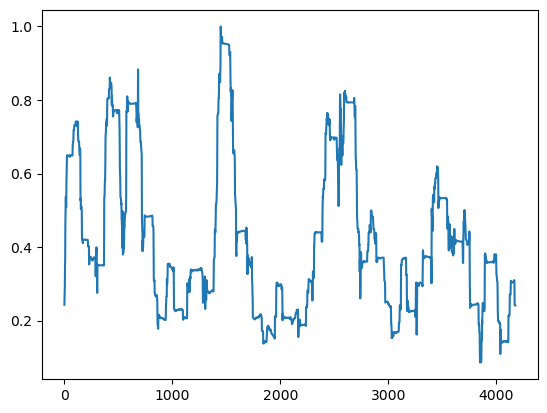

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors = 1)
model.fit(train_vec)

dist, _ = model.kneighbors(test_vec)
dist = dist / np.max(dist)

plt.plot(dist)
plt.show()

In [8]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (144,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(144, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               18560     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 144)               18576     
                                                                 
Total params: 57904 (226.19 KB)
Trainable params: 5790

In [18]:
model.compile(loss = 'mse', optimizer = 'adam')
hist = model.fit(train_vec, train_vec, batch_size = 128, verbose = 1, epochs = 20, validation_split = 0.2)

Epoch 1/20
81/81 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 2/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 3/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 6/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 7/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 8/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 9/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 10/20
81/81 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 11/20
81/81 [

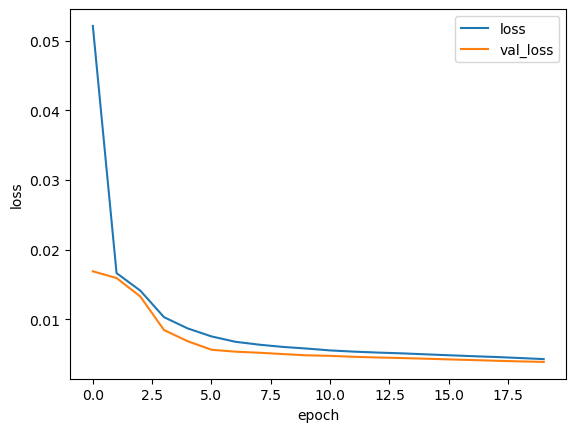

In [15]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

131/131 [==============================] - 0s 854us/step


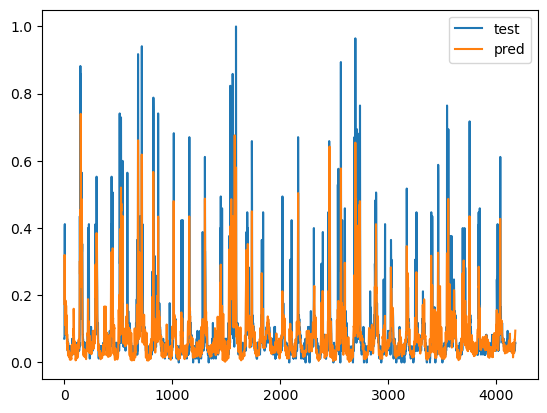

In [19]:
pred = model.predict(test_vec)

plt.plot(test_vec[:,0], label = 'test')
plt.plot(pred[:,0], label = 'pred')
plt.legend()
plt.show()

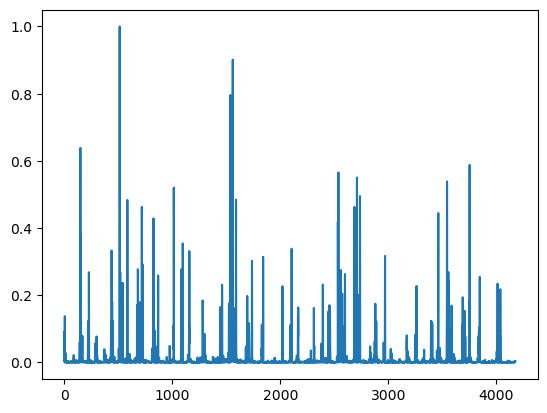

In [20]:
dist = test_vec[:,0] - pred[:,0]
dist = pow(dist, 2)
dist = dist/np.max(dist)

plt.plot(dist)
plt.show()